# MSE 491 Assignment 1 Regression

### Mahmoud Kamaleldin 301324899
### Andrei Divinagracia 301360608

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# Load General Libraries
import numpy as np
import pandas as pd
import scipy
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set(rc={'figure.figsize':(15, 8)})

## Preprocessing Data

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
def split_feats_targets(df, targets):
    Y = df[targets].values
    X = df.drop(columns=targets).values
    
    return X, Y

def split_train_validation_dataset(df, split):
    mask = np.random.rand(len(df)) < split
    df_train = df[mask]
    df_test = df[~mask]
    
    return df_train, df_test

In [4]:
extension = 'csv'
all_filenames = [i for i in glob.glob('Gas Turbine Dataset/*.{}'.format(extension))]


df_raw = pd.concat([pd.read_csv(f) for f in all_filenames])

targets = ["NOX", "CO", "TEY"]
features = [column for column in df_raw.columns if column not in targets]

In [5]:
print(f"Targets = {targets}")
print(f"Features = {features}")

Targets = ['NOX', 'CO', 'TEY']
Features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP']


In [6]:
print(f"Is there any NaN values in df? {df_raw.isnull().values.any()}")

Is there any NaN values in df? False


In [7]:
#display_all(df_raw.tail().T)
#display_all(df_raw.describe(include='all').T)

Text(0, 0.5, 'Number of Points')

<Figure size 1080x576 with 0 Axes>

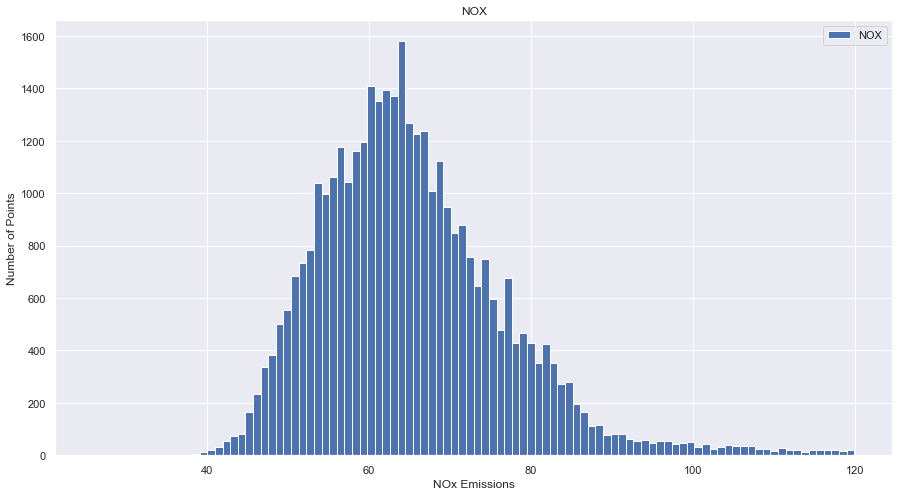

In [8]:
fig=plt.figure()
df_raw.hist(column="NOX", bins=100, legend=True)
plt.xlabel("NOx Emissions")
plt.ylabel("Number of Points")

### Histogram of NOx Emissions
The distribution above looks like a normal distribution around 65

Text(0, 0.5, 'TEY')

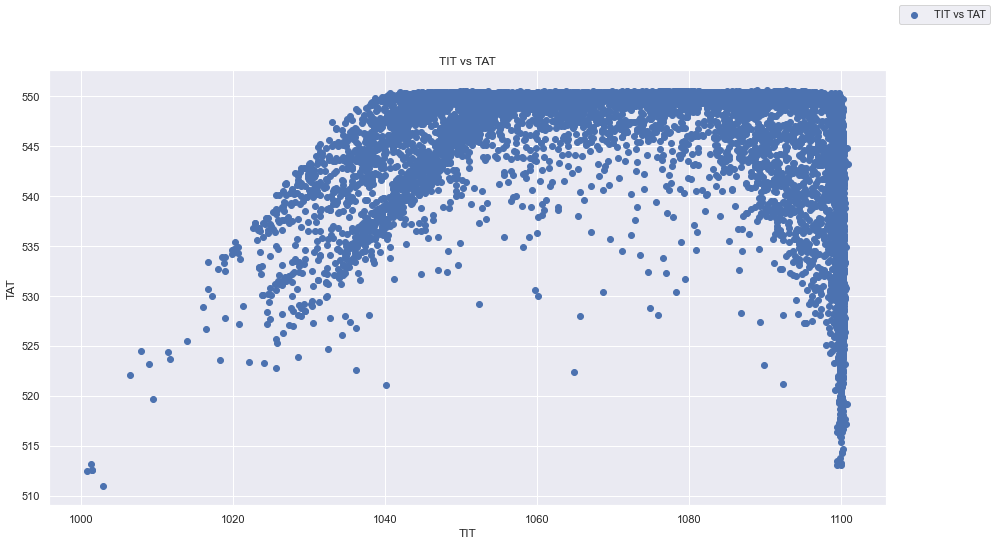

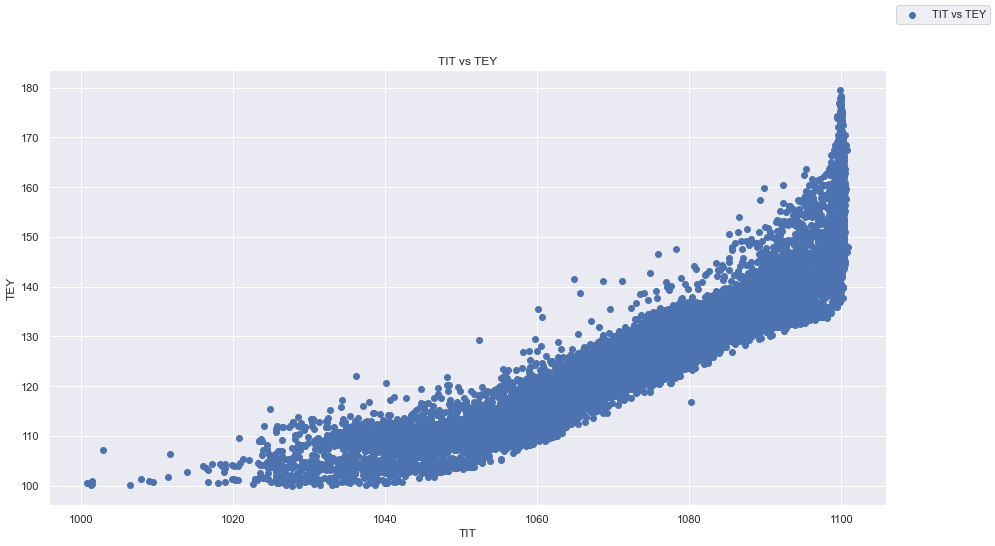

In [9]:
fig=plt.figure()
plt.scatter(df_raw['TIT'], df_raw['TAT'], label = "TIT vs TAT")
fig.legend(loc = 'upper right')
plt.title("TIT vs TAT")
plt.xlabel("TIT")
plt.ylabel("TAT")

fig=plt.figure()
plt.scatter(df_raw['TIT'], df_raw['TEY'], label = "TIT vs TEY")
fig.legend(loc = 'upper right')
plt.title("TIT vs TEY")
plt.xlabel("TIT")
plt.ylabel("TEY")

In [10]:
print(f"Pearson's Correlation Coefficient of TIT vs TAT: {scipy.stats.pearsonr(df_raw['TIT'], df_raw['TAT'])}")
print(f"Pearson's Correlation Coefficient of TIT vs TEY: {scipy.stats.pearsonr(df_raw['TIT'], df_raw['TEY'])}")

Pearson's Correlation Coefficient of TIT vs TAT: (-0.3808623936201179, 0.0)
Pearson's Correlation Coefficient of TIT vs TEY: (0.9102972462822896, 0.0)


### Scatter Plots and Pearson's Correlation Coefficients of TIT vs TAT and TIT vs TEY
There appears to be a non linear associations between TIT and TAT with a decreasing slope the higher TIT rises.
On the other hand, there appears to be a linear relationship between TIT and TEY.

In both cases, there seems to be a hard limitation to the sensor readings indicating that there may be readings that go beyond the range of the sensor that are incorrectly recorded which might affect the relationship inference from the scatter plots.

Looking at the Pearson's correlation coefficients, this confirms our assumptions based on the scatter plots. For TIT vs TAT, a PCC of ~-0.381 indicates there isn't a strong linearity between the two variables, this might even be skewed higher because of the apparent limitation on TIT readings. For TIT vs TEY, a PCC of ~0.910 indicates a strong positive linear relationship between the variables as we can see in the scatter plot.

In [11]:
df_train, df_test = split_train_validation_dataset(df_raw, 0.80)

## Simple Linear Regression

#### Training

In [12]:
for target in targets:
    print(df_train[features + [target]].corr()[target][:], "\n")
    

AT     -0.556166
AP      0.190870
AH      0.162961
AFDP   -0.188594
GTEP   -0.202802
TIT    -0.214106
TAT    -0.090265
CDP    -0.172815
NOX     1.000000
Name: NOX, dtype: float64 

AT     -0.177292
AP      0.069731
AH      0.102982
AFDP   -0.447493
GTEP   -0.515254
TIT    -0.705217
TAT     0.053077
CDP    -0.547578
CO      1.000000
Name: CO, dtype: float64 

AT     -0.090869
AP      0.120131
AH     -0.134814
AFDP    0.665066
GTEP    0.964201
TIT     0.909833
TAT    -0.682405
CDP     0.988722
TEY     1.000000
Name: TEY, dtype: float64 



Highest correlation for NOX was with AT: ~-0.559  
Highest correlation for CO was with TIT: ~-0.706  
Highest correlation for TEY was with CDP: ~0.989

In [13]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

In [14]:
NOX_lin_reg = LinearRegression()
CO_lin_reg = LinearRegression()
TEY_lin_reg = LinearRegression()

In [15]:
x_NOX_train = df_train["AT"].to_numpy().reshape(-1,1)
y_NOX_train = df_train["NOX"].to_numpy()
x_NOX_test = df_test["AT"].to_numpy().reshape(-1,1)
y_NOX_test = df_test["NOX"].to_numpy()

x_CO_train = df_train["TIT"].to_numpy().reshape(-1,1)
y_CO_train = df_train["CO"].to_numpy()
x_CO_test = df_test["TIT"].to_numpy().reshape(-1,1)
y_CO_test = df_test["CO"].to_numpy()

x_TEY_train = df_train["CDP"].to_numpy().reshape(-1,1)
y_TEY_train = df_train["TEY"].to_numpy()
x_TEY_test = df_test["CDP"].to_numpy().reshape(-1,1)
y_TEY_test = df_test["TEY"].to_numpy()

In [16]:
NOX_lin_reg.fit(x_NOX_train, y_NOX_train)
CO_lin_reg.fit(x_CO_train, y_CO_train)
TEY_lin_reg.fit(x_TEY_train, y_TEY_train)

pickle.dump(NOX_lin_reg, open('Model_NOX_lin_reg.pkl', 'wb'))
pickle.dump(CO_lin_reg, open('Model_CO_lin_reg.pkl', 'wb'))
pickle.dump(TEY_lin_reg, open('Model_TEY_lin_reg.pkl', 'wb'))

#### Evaluation

In [17]:
def viz_linear(x, y, lin_model, title, xaxis, yaxis):
    plt.scatter(x, y, color='red')
    plt.plot(x, lin_model.predict(x), color='blue')
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()
    return

def get_model_score(lin_model, x, y):
    y_pred = lin_model.predict(x)
    r2 = r2_score(y_pred, y)
    rmse = mean_squared_error(y_pred, y, squared=False)
    
    return r2, rmse

def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

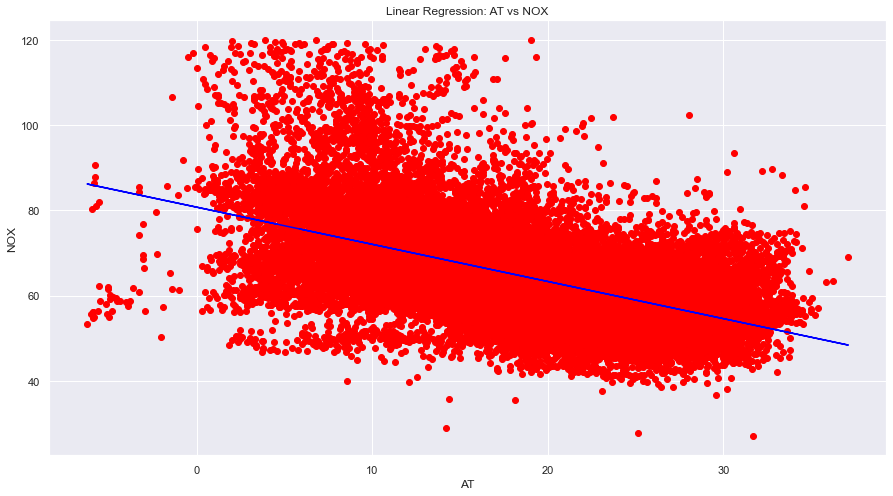

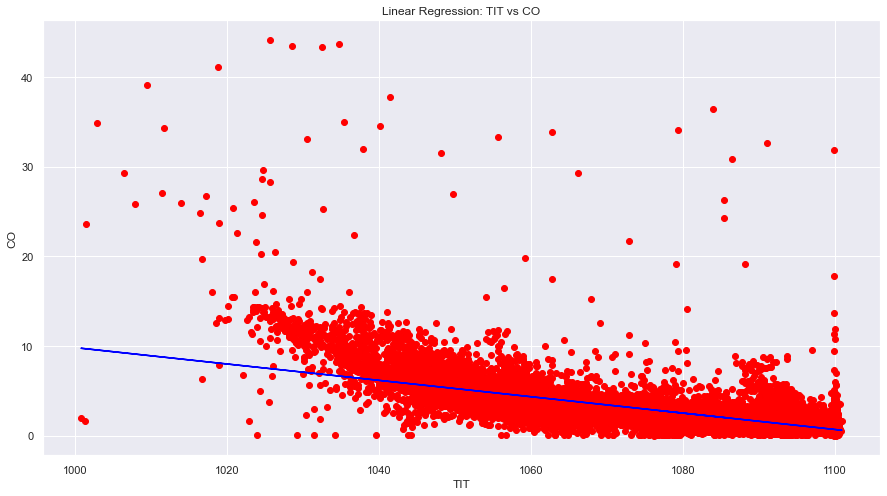

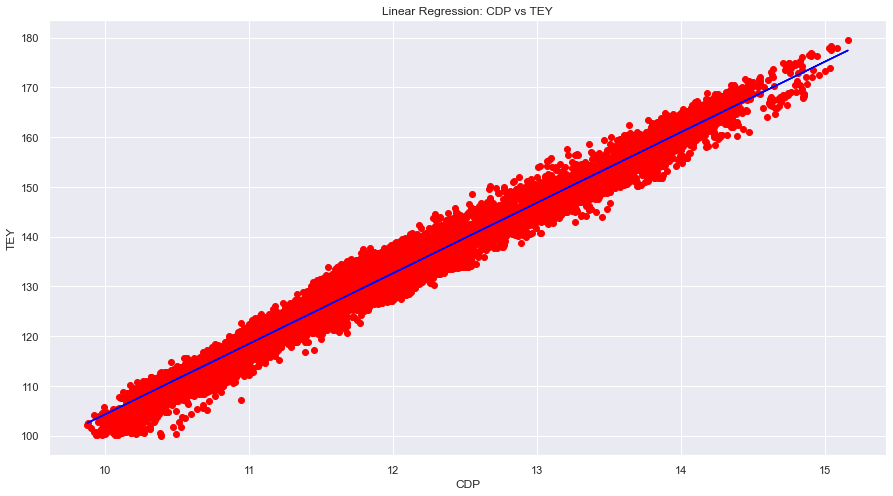

In [18]:
viz_linear(x_NOX_train, y_NOX_train, NOX_lin_reg, "Linear Regression: AT vs NOX", "AT", "NOX")
viz_linear(x_CO_train, y_CO_train, CO_lin_reg, "Linear Regression: TIT vs CO", "TIT", "CO")
viz_linear(x_TEY_train, y_TEY_train, TEY_lin_reg, "Linear Regression: CDP vs TEY", "CDP", "TEY")

In [19]:
r2_NOX_test, rmse_NOX_test = get_model_score(NOX_lin_reg, x_NOX_test, y_NOX_test)
r2_CO_test, rmse_CO_test = get_model_score(CO_lin_reg, x_CO_test, y_CO_test)
r2_TEY_test, rmse_TEY_test = get_model_score(TEY_lin_reg, x_TEY_test, y_TEY_test)

r2_NOX_train, rmse_NOX_train = get_model_score(NOX_lin_reg, x_NOX_train, y_NOX_train)
r2_CO_train, rmse_CO_train = get_model_score(CO_lin_reg, x_CO_train, y_CO_train)
r2_TEY_train, rmse_TEY_train = get_model_score(TEY_lin_reg, x_TEY_train, y_TEY_train)

print(f"Performance of linear regression model for NOX, train: R2 = {r2_NOX_train}, RMSE = {rmse_NOX_train}, test: R2 = {r2_NOX_test}, RMSE = {rmse_NOX_test}")
print(f"Performance of linear regression model for CO, train: R2 = {r2_CO_train}, RMSE = {rmse_CO_train}, test: R2 = {r2_CO_test}, RMSE = {rmse_CO_test}")
print(f"Performance of linear regression model for TEY, train: R2 = {r2_TEY_train}, RMSE = {rmse_TEY_train}, test: R2 = {r2_TEY_test}, RMSE = {rmse_TEY_test}")

Performance of linear regression model for NOX, train: R2 = -1.2328875099458365, RMSE = 9.710861125613675, test: R2 = -1.2102405175737436, RMSE = 9.604356530877235
Performance of linear regression model for CO, train: R2 = -0.010731723730540654, RMSE = 1.6072550739914218, test: R2 = 0.04310829306179176, RMSE = 1.579743223666223
Performance of linear regression model for TEY, train: R2 = 0.9770563350833242, RMSE = 2.334082474534195, test: R2 = 0.9775927039498988, RMSE = 2.330227903515445


### Bar Graphs for Simple Linear Regression
Based on the graphs, the error for the NOX model which indicates that the model doesn't fit the dataset very well. For the CO model, there is smaller RMSE and less variance but outliers are still present. Finally for the TEY model, the RMSE hovers around the same range for all the points indicating that the points follow along with the linear regression model across the dataset.

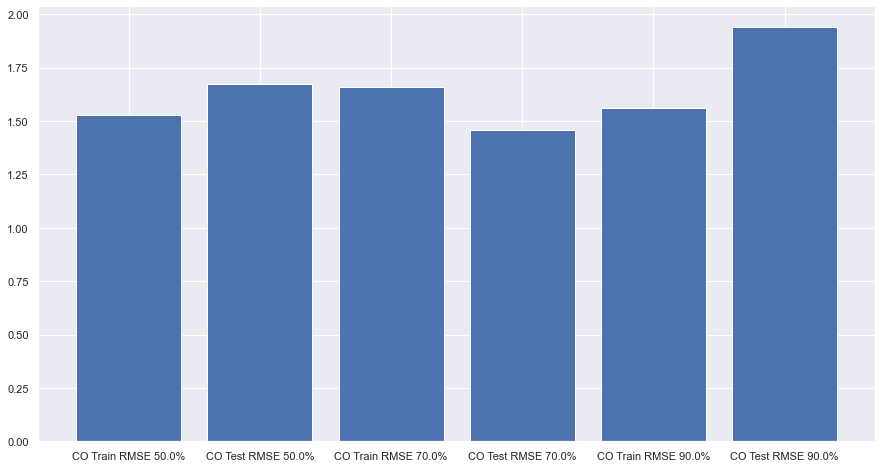

In [20]:
CO_lin_regPt2 = LinearRegression()

datasplit = [0.50,0.70,0.90]
resultDict = {}

for pct in datasplit:
  df_trainPt2, df_testPt2 = split_train_validation_dataset(df_raw, pct)
  CO_lin_regPt2 = LinearRegression()

  x_CO_trainPt2 = df_trainPt2["TIT"].to_numpy().reshape(-1,1)
  y_CO_trainPt2 = df_trainPt2["CO"].to_numpy()
  x_CO_testPt2 = df_testPt2["TIT"].to_numpy().reshape(-1,1)
  y_CO_testPt2 = df_testPt2["CO"].to_numpy()

  CO_lin_regPt2.fit(x_CO_trainPt2, y_CO_trainPt2)

  _, rmse_CO_trainPt2 = get_model_score(CO_lin_regPt2, x_CO_trainPt2, y_CO_trainPt2)
  _, rmse_CO_testPt2 = get_model_score(CO_lin_regPt2, x_CO_testPt2, y_CO_testPt2)

  resultDict[f"CO Train RMSE {pct*100}%"] = rmse_CO_trainPt2
  resultDict[f"CO Test RMSE {pct*100}%"] = rmse_CO_testPt2


plt.bar(range(len(resultDict)), list(resultDict.values()), align='center')
plt.xticks(range(len(resultDict)), list(resultDict.keys()))

plt.show()


The bigger the dataset provided to train the linear regression model the lower the RMSE became, this applied when calculating RMSE for both the train and test datasets meaning that the model has not overfitted

In [22]:
x_CO_train50 = df_train50["TIT"].to_numpy().reshape(-1,1)
y_CO_train50 = df_train50["CO"].to_numpy()
x_CO_test50 = df_test50["TIT"].to_numpy().reshape(-1,1)
y_CO_test50 = df_test50["CO"].to_numpy()

x_CO_train70 = df_train50["TIT"].to_numpy().reshape(-1,1)
y_CO_train70 = df_train50["CO"].to_numpy()
x_CO_test50 = df_test50["TIT"].to_numpy().reshape(-1,1)
y_CO_test50 = df_test50["CO"].to_numpy()

x_CO_train50 = df_train50["TIT"].to_numpy().reshape(-1,1)
y_CO_train50 = df_train50["CO"].to_numpy()
x_CO_test50 = df_test50["TIT"].to_numpy().reshape(-1,1)
y_CO_test50 = df_test50["CO"].to_numpy()

NOX_lin_reg.fit(x_NOX_train, y_NOX_train)
CO_lin_reg.fit(x_CO_train, y_CO_train)
TEY_lin_reg.fit(x_TEY_train, y_TEY_train)

NameError: name 'df_train50' is not defined

## Multiple Linear Regression

#### Training

In [23]:
CO_lin_reg_all = LinearRegression()
TEY_lin_reg_all = LinearRegression()

In [24]:
x_CO_train = df_train[features].to_numpy()
y_CO_train = df_train["CO"].to_numpy()
x_CO_test = df_test[features].to_numpy()
y_CO_test = df_test["CO"].to_numpy()

x_TEY_train = df_train[features].to_numpy()
y_TEY_train = df_train["TEY"].to_numpy()
x_TEY_test = df_test[features].to_numpy()
y_TEY_test = df_test["TEY"].to_numpy()

In [25]:
CO_lin_reg_all.fit(x_CO_train, y_CO_train)
TEY_lin_reg_all.fit(x_TEY_train, y_TEY_train)

pickle.dump(CO_lin_reg_all, open('Model_CO_lin_reg_all.pkl', 'wb'))
pickle.dump(TEY_lin_reg_all, open('Model_TEY_lin_reg_all.pkl', 'wb'))

#### Evaluation

In [26]:
r2_CO, rmse_CO = get_model_score(CO_lin_reg_all, x_CO_test, y_CO_test)
r2_TEY, rmse_TEY = get_model_score(TEY_lin_reg_all, x_TEY_test, y_TEY_test)

print(f"Performance of linear regression model for CO: R2 = {r2_CO}, RMSE = {rmse_CO}")
print(f"Performance of linear regression model for TEY: R2 = {r2_TEY}, RMSE = {rmse_TEY}")

resultDict = {}
resultDict["CO RMSE All Feats"] = rmse_CO
resultDict["TEY RMSE All Feats"] = rmse_TEY

Performance of linear regression model for CO: R2 = 0.22532741356701924, RMSE = 1.5023001432404555
Performance of linear regression model for TEY: R2 = 0.9961780703801928, RMSE = 0.9723222409551351


In [35]:
resultDict

{'CO RMSE All Feats': 1.5023001432404555,
 'TEY RMSE All Feats': 0.9723222409551351,
 'CO RMSE 4 Feats': 1.51841773951135,
 'TEY RMSE 4 Feats': 2.2728386365671525}

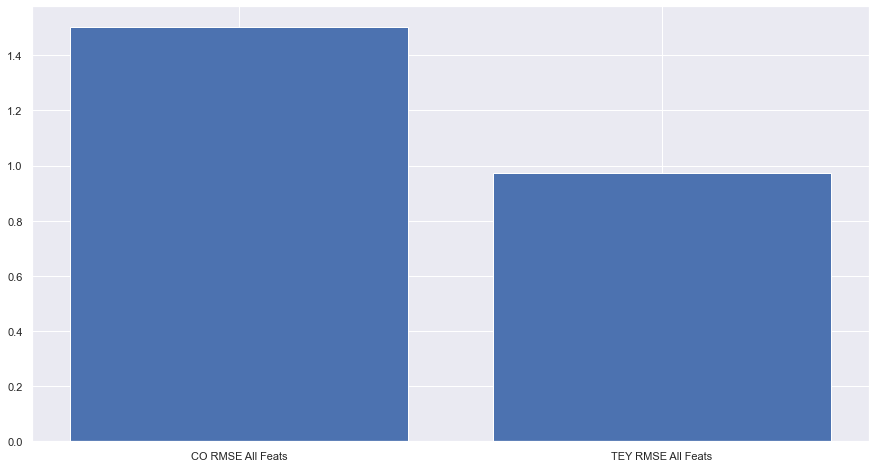

In [27]:
plt.bar(range(len(resultDict)), list(resultDict.values()), align='center')
plt.xticks(range(len(resultDict)), list(resultDict.keys()))

plt.show()

                                RMSE for Multiple Linear Regression Model Using 8 Features for CO and TEY

### Bar Graphs for Multiple Linear Regression
As we can see from both R2 score, the RMSE and the bar graphs, both models improved dramatically when more features were used compared to single feature linear regression. More features doesn't always lead to a better model due to the risk of overfitting or correlatory reltionships between the features, however in this case the models did improve but this doesn't necessarily mean that 8 features is the optimal choice, a more rigirous selection of features may lead to better results.

Feature: AT, Score: -0.3246097394401645
Feature: AP, Score: -0.05568927318612525
Feature: AH, Score: -0.0034302803563874083
Feature: AFDP, Score: -0.1709250091246342
Feature: GTEP, Score: 0.27391570840277984
Feature: TIT, Score: 0.16136749593410413
Feature: TAT, Score: 0.05081266936112944
Feature: CDP, Score: 11.160693133296924


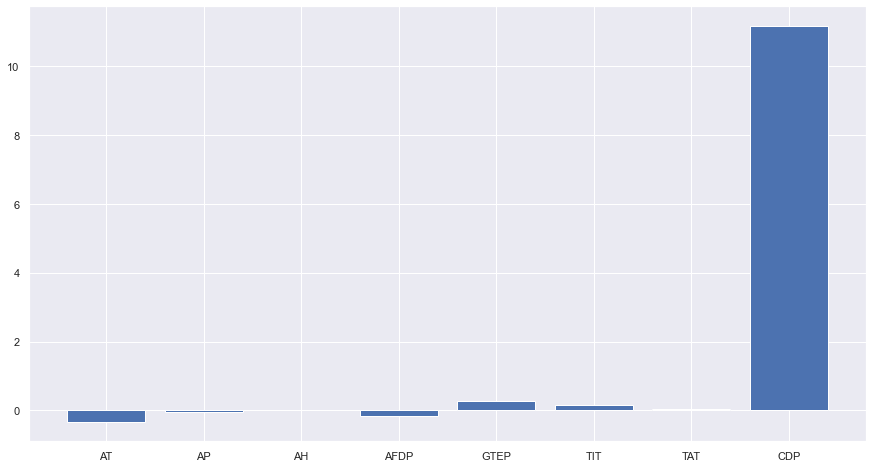

Feature: AT, Score: 0.012316737283588768
Feature: AP, Score: 0.008065847622340265
Feature: AH, Score: -0.00762965301709013
Feature: AFDP, Score: -0.10371648847865066
Feature: GTEP, Score: 0.04933830682155037
Feature: TIT, Score: -0.10359261152049315
Feature: TAT, Score: -0.09062223233605896
Feature: CDP, Score: -0.1895021161927009


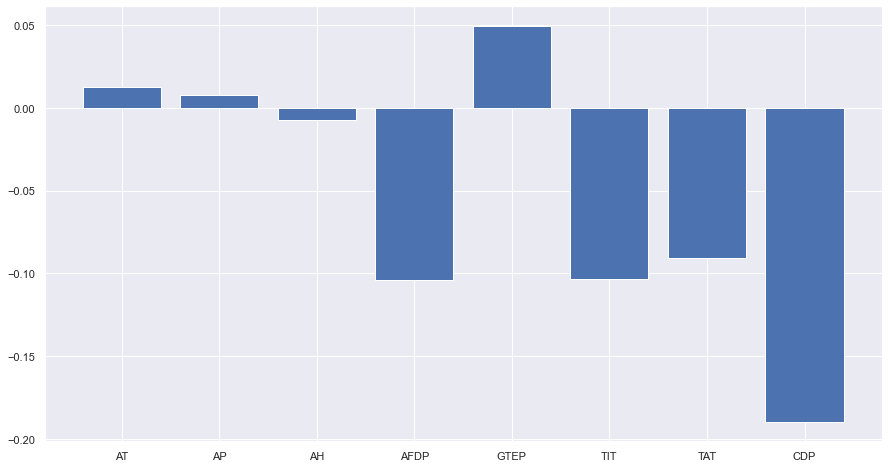

In [28]:
importance = [[], []]
importance[0] = list(TEY_lin_reg_all.coef_)
importance[1] = features

# summarize feature importance
for i in range(0, len(importance[0])):
	print(f'Feature: {importance[1][i]}, Score: {importance[0][i]}')
# plot feature importance
plt.bar(importance[1], importance[0])
plt.show()

importance = [[], []]
importance[0] = list(CO_lin_reg_all.coef_)
importance[1] = features

# summarize feature importance
for i in range(0, len(importance[0])):
	print(f'Feature: {importance[1][i]}, Score: {importance[0][i]}')
# plot feature importance
plt.bar(importance[1], importance[0])
plt.show()

## Multiple Linear Regression with Feature Selection

#### Feature Selection

In [29]:
CO_feat_correlation = df_train[features + ["CO"]].corr()["CO"][:].drop("CO").abs()
CO_impt_feats = []
print(CO_feat_correlation, "\n")

for i in range(0,4):
    max_corr = CO_feat_correlation.idxmax()
    CO_impt_feats.append(max_corr)
    CO_feat_correlation = CO_feat_correlation.drop(max_corr)
    
    
print(f"4 Most important features for CO: {CO_impt_feats}", "\n")

TEY_feat_correlation = df_train[features + ["TEY"]].corr()["TEY"][:].drop("TEY").abs()
TEY_impt_feats = []
print(TEY_feat_correlation, "\n")

for i in range(0,4):
    max_corr = TEY_feat_correlation.idxmax()
    TEY_impt_feats.append(max_corr)
    TEY_feat_correlation = TEY_feat_correlation.drop(max_corr)
    
    
print(f"4 Most important features for TEY: {TEY_impt_feats}", "\n")

AT      0.177292
AP      0.069731
AH      0.102982
AFDP    0.447493
GTEP    0.515254
TIT     0.705217
TAT     0.053077
CDP     0.547578
Name: CO, dtype: float64 

4 Most important features for CO: ['TIT', 'CDP', 'GTEP', 'AFDP'] 

AT      0.090869
AP      0.120131
AH      0.134814
AFDP    0.665066
GTEP    0.964201
TIT     0.909833
TAT     0.682405
CDP     0.988722
Name: TEY, dtype: float64 

4 Most important features for TEY: ['CDP', 'GTEP', 'TIT', 'TAT'] 



Based on the correlation coefficients calculated, we select the indicated features for the model training

#### Training

In [30]:
CO_lin_reg_imp = LinearRegression()
TEY_lin_reg_imp = LinearRegression()

In [31]:
x_CO_train = df_train[CO_impt_feats].to_numpy()
y_CO_train = df_train["CO"].to_numpy()
x_CO_test = df_test[CO_impt_feats].to_numpy()
y_CO_test = df_test["CO"].to_numpy()

x_TEY_train = df_train[TEY_impt_feats].to_numpy()
y_TEY_train = df_train["TEY"].to_numpy()
x_TEY_test = df_test[TEY_impt_feats].to_numpy()
y_TEY_test = df_test["TEY"].to_numpy()

In [32]:
CO_lin_reg_imp.fit(x_CO_train, y_CO_train)
TEY_lin_reg_imp.fit(x_TEY_train, y_TEY_train)

pickle.dump(CO_lin_reg_imp, open('Model_CO_lin_reg_4_imp.pkl', 'wb'))
pickle.dump(TEY_lin_reg_imp, open('Model_TEY_lin_reg_4_imp.pkl', 'wb'))

#### Evaluation

In [33]:
r2_CO, rmse_CO = get_model_score(CO_lin_reg_imp, x_CO_test, y_CO_test)
r2_TEY, rmse_TEY = get_model_score(TEY_lin_reg_imp, x_TEY_test, y_TEY_test)

print(f"Performance of linear regression model for CO: R2 = {r2_CO}, RMSE = {rmse_CO}")
print(f"Performance of linear regression model for TEY: R2 = {r2_TEY}, RMSE = {rmse_TEY}")

resultDict["CO RMSE 4 Feats"] = rmse_CO
resultDict["TEY RMSE 4 Feats"] = rmse_TEY

Performance of linear regression model for CO: R2 = 0.19328871806850012, RMSE = 1.51841773951135
Performance of linear regression model for TEY: R2 = 0.9787078763443118, RMSE = 2.2728386365671525


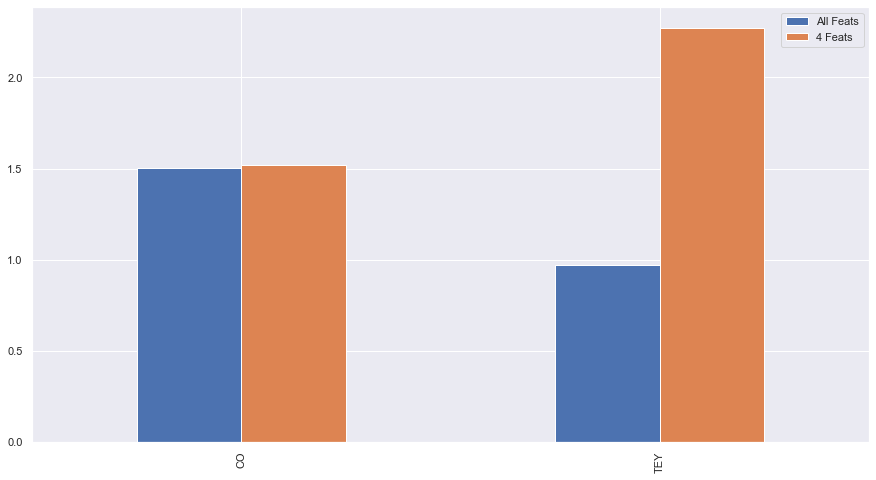

In [34]:
displayDict = {
    "All Feats":{
       "CO": resultDict["CO RMSE All Feats"],
       "TEY": resultDict["TEY RMSE All Feats"],
    },
    "4 Feats":{
       "CO": resultDict["CO RMSE 4 Feats"],
       "TEY": resultDict["TEY RMSE 4 Feats"],
    }
}


pd.DataFrame(displayDict).plot(kind='bar')
plt.show()

### Bar Graphs for Multiple Linear Regression with 4 Features
This time using the 4 most important features for both models we observe something interesting. For the CO model, the performance does not change much so the speed of the model could be improved with reduced feature without much of an effect on accuracy. However, for the TEY model, the perfomance was decreased.

## Polynomial Regression

In [ ]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#### Training

In [ ]:
x_TEY_train = df_train[TEY_impt_feats].to_numpy()
y_TEY_train = df_train["TEY"].to_numpy()
x_TEY_test = df_test[TEY_impt_feats].to_numpy()
y_TEY_test = df_test["TEY"].to_numpy()

scaler2 = preprocessing.StandardScaler()
scaler5 = preprocessing.StandardScaler()
scaler8 = preprocessing.StandardScaler()

In [ ]:
polyreg2_TEY = make_pipeline(PolynomialFeatures(2),scaler2,LinearRegression())
polyreg2_TEY.fit(x_TEY_train, y_TEY_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
polyreg5_TEY = make_pipeline(PolynomialFeatures(5),scaler5,LinearRegression())
polyreg5_TEY.fit(x_TEY_train, y_TEY_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
polyreg11_TEY = make_pipeline(PolynomialFeatures(11),scaler8,LinearRegression(n_jobs=-1))
polyreg11_TEY.fit(x_TEY_train, y_TEY_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                                  normalize=False))],
         verbose=False)

In [ ]:
pickle.dump(polyreg11_TEY, open('Model_polyreg11_TEY.pkl', 'wb'))
pickle.dump(polyreg5_TEY, open('Model_polyreg5_TEY.pkl', 'wb'))
pickle.dump(polyreg2_TEY, open('Model_polyreg2_TEY.pkl', 'wb'))

#### Evaluation

In [ ]:
r2_TEY_2, rmse_TEY_2 = get_model_score(polyreg2_TEY, x_TEY_test, y_TEY_test)
TEY_rmse_list_2 = [rmse(y_pred, y_true) for y_pred, y_true in zip(polyreg2_TEY.predict(x_TEY_test), y_TEY_test)]

r2_TEY_5, rmse_TEY_5 = get_model_score(polyreg5_TEY, x_TEY_test, y_TEY_test)
TEY_rmse_list_5 = [rmse(y_pred, y_true) for y_pred, y_true in zip(polyreg5_TEY.predict(x_TEY_test), y_TEY_test)]

r2_TEY_11, rmse_TEY_11 = get_model_score(polyreg11_TEY, x_TEY_test, y_TEY_test)
TEY_rmse_list_11 = [rmse(y_pred, y_true) for y_pred, y_true in zip(polyreg11_TEY.predict(x_TEY_test), y_TEY_test)]

print(f"Performance of 2nd order polynomial regression model for TEY: R2 = {r2_TEY_2}, RMSE = {rmse_TEY_2}")
print(f"Performance of linear regression model for TEY: R2 = {r2_TEY_5}, RMSE = {rmse_TEY_5}")
print(f"Performance of linear regression model for TEY: R2 = {r2_TEY_11}, RMSE = {rmse_TEY_11}")

resultDict = {
    "TEY RMSE 2nd Order": rmse_TEY_2,
    "TEY RMSE 5th Order": rmse_TEY_5,
    "TEY RMSE 11th Order": rmse_TEY_11,    
}

Performance of 2nd order polynomial regression model for TEY: R2 = 0.9832445217014364, RMSE = 1.9908992904803506
Performance of linear regression model for TEY: R2 = 0.9870761372554786, RMSE = 1.752718704614293
Performance of linear regression model for TEY: R2 = 0.336775825442049, RMSE = 20.65560385704339


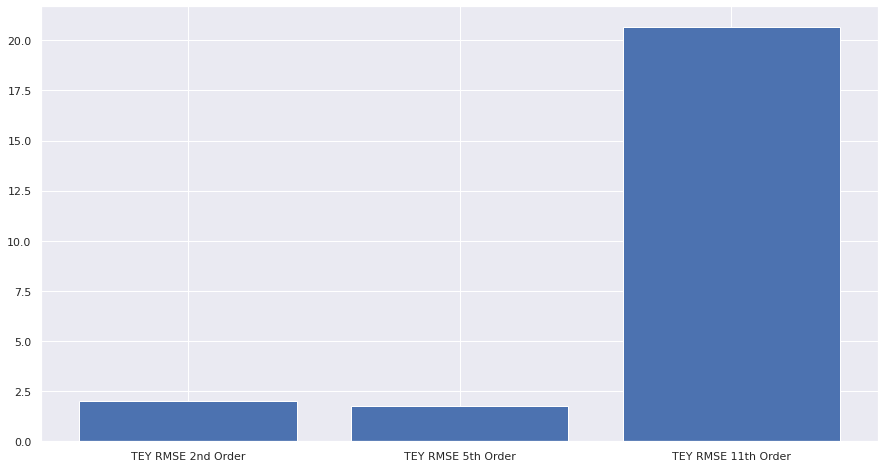

In [ ]:
plt.bar(range(len(resultDict)), list(resultDict.values()), align='center')
plt.xticks(range(len(resultDict)), list(resultDict.keys()))

plt.show()

We can observe from this bar chart that the performance of the model improves from 2nd order to 5th order. Increasing the order of the polynomial to 11th order causes the model to overfit meaning that it does not generalize well for a new point and so the RMSE shoots up by more than 1000%

In [ ]:
import time

df = pd.read_csv("Gas Turbine Dataset/gt_2015.csv")
targets = ["NOX", "CO", "TEY"]
features = [column for column in df.columns if column not in targets]

x_test = df[features].to_numpy()
y_test = df["TEY"].to_numpy()

lin_model = pickle.load(open("Model_TEY_lin_reg_all.pkl", 'rb'))

start = time.time()
y_pred = lin_model.predict(x_test)
end = time.time()

print(f"Model took {end-start} seconds to predict on gt_2015.csv")

Model took 0.0004899501800537109 seconds to predict on gt_2015.csv
